In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\Faraz\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
url="C:\\Users\\Faraz\\Downloads\\po2_data.csv"
df=pd.read_csv(url)
df.head()

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject#        5875 non-null   int64  
 1   age             5875 non-null   int64  
 2   sex             5875 non-null   int64  
 3   test_time       5875 non-null   float64
 4   motor_updrs     5875 non-null   float64
 5   total_updrs     5875 non-null   float64
 6   jitter(%)       5875 non-null   float64
 7   jitter(abs)     5875 non-null   float64
 8   jitter(rap)     5875 non-null   float64
 9   jitter(ppq5)    5875 non-null   float64
 10  jitter(ddp)     5875 non-null   float64
 11  shimmer(%)      5875 non-null   float64
 12  shimmer(abs)    5875 non-null   float64
 13  shimmer(apq3)   5875 non-null   float64
 14  shimmer(apq5)   5875 non-null   float64
 15  shimmer(apq11)  5875 non-null   float64
 16  shimmer(dda)    5875 non-null   float64
 17  nhr             5875 non-null   f

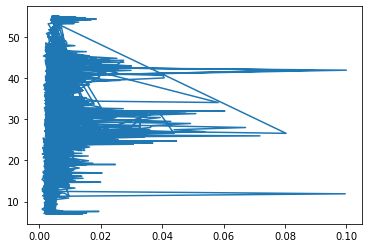

In [4]:
plt.plot(df['jitter(%)'],df['total_updrs'])
plt.show()

In [5]:
df.isnull().sum()

subject#          0
age               0
sex               0
test_time         0
motor_updrs       0
total_updrs       0
jitter(%)         0
jitter(abs)       0
jitter(rap)       0
jitter(ppq5)      0
jitter(ddp)       0
shimmer(%)        0
shimmer(abs)      0
shimmer(apq3)     0
shimmer(apq5)     0
shimmer(apq11)    0
shimmer(dda)      0
nhr               0
hnr               0
rpde              0
dfa               0
ppe               0
dtype: int64

<Axes: xlabel='jitter(%)', ylabel='total_updrs'>

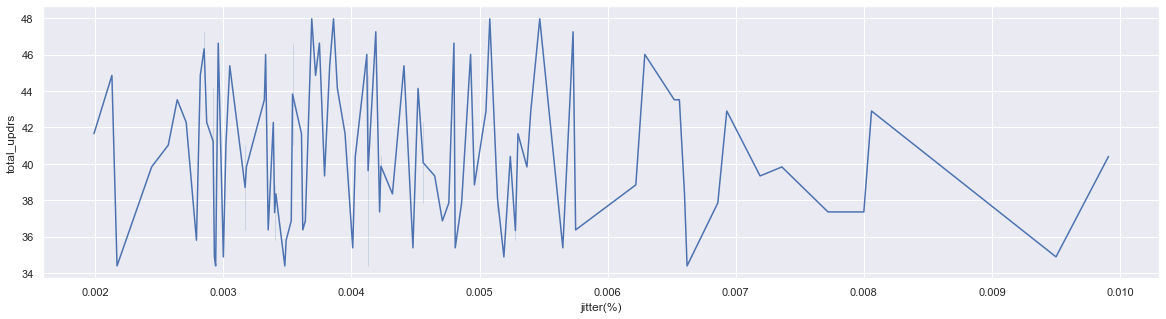

In [6]:
sns.set(rc={'figure.figsize':(20,5)})
sns.lineplot(x='jitter(%)',y='total_updrs',data=df.head(100))

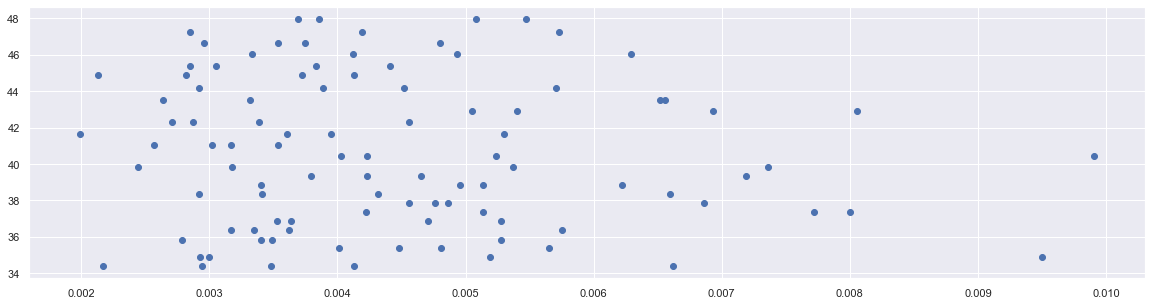

In [7]:
plt.scatter(df['jitter(%)'].head(100),df['total_updrs'].head(100))
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
train_size=int(0.8*len(df))
training_set=df.iloc[:train_size,:]
testing_set=df.iloc[train_size:,:]
testing_set

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
4700,35,71,0,55.427,36.630,54.630,0.00644,0.000048,0.00280,0.00373,...,0.347,0.01732,0.02423,0.03757,0.05196,0.015500,20.135,0.46476,0.77366,0.30116
4701,35,71,0,62.407,36.709,54.709,0.00557,0.000039,0.00300,0.00289,...,0.298,0.01705,0.01901,0.03213,0.05114,0.011377,21.024,0.49709,0.74069,0.22621
4702,35,71,0,69.412,36.789,54.789,0.01178,0.000082,0.00498,0.00566,...,0.630,0.03052,0.04219,0.04848,0.09155,0.045229,16.685,0.61271,0.75825,0.35060
4703,35,71,0,76.392,36.868,54.868,0.00536,0.000037,0.00208,0.00299,...,0.288,0.01472,0.01879,0.02998,0.04417,0.012209,21.185,0.48211,0.72898,0.27964
4704,35,71,0,83.455,36.948,54.948,0.00637,0.000044,0.00278,0.00356,...,0.399,0.01825,0.02187,0.03283,0.05476,0.018336,19.902,0.51928,0.75416,0.24856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.790,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.840,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.820,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.730,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [10]:
X_train=training_set['jitter(%)'].values.reshape(-1,1)
X_test=testing_set['jitter(%)'].values.reshape(-1,1)
y_train=training_set['total_updrs'].values.reshape(-1,1)
y_test=testing_set['total_updrs'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures

In [12]:
llm=LinearRegression()
best_score=[]
n=5

for i in range(5):
    poly=PolynomialFeatures(degree=i)
    poly2=poly.fit_transform(X_train)
    poly3=poly.fit_transform(X_test)
    model=LinearRegression()
    llm.fit(poly2,y_train)
    pre=llm.predict(poly3)
    best_score.append(r2_score(y_test,pre))

best_score    

[-1.1745915306200936,
 -1.1424009444355359,
 -1.1218745030430517,
 -1.14069446207083,
 -1.1623058208521377]

In [13]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
pre=model.predict(X_test)
r2_score(y_test,pre)

-1.1424009444355367

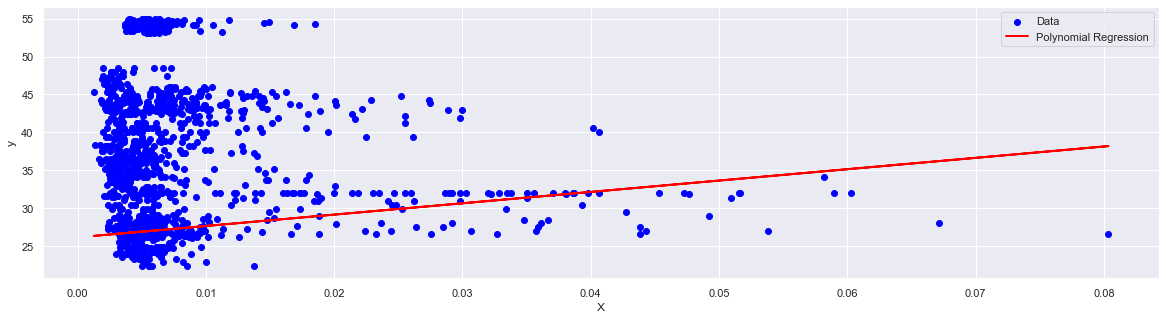

In [15]:
plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, pre, color='red', linewidth=2, label='Polynomial Regression')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pre)
print("MAE:", mae)

MAE: 10.518428141110729


In [17]:
mse = mean_squared_error(y_test, pre)
print("MSE:", mse)

MSE: 190.24176931268502


In [18]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 13.792815858724607


In [19]:
r2 = r2_score(y_test, pre)
print("R-squared:", r2)

R-squared: -1.1424009444355367


In [20]:
n = len(y_test)  # Number of data points
p = len(pre)  # Number of predictors (if you are working with a model)

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 2516.17870876732


In [21]:
range_actual_values = np.max(y_test) - np.min(y_test)
nrmse = rmse / range_actual_values
print("NRMSE:", nrmse)

NRMSE: 0.4225351793255708
